In [1]:
import math
import random
import tensorflow as tf
import numpy as np
from mnist import MNIST

In [2]:
def forward_propagation_for_predict(X, parameters):
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [25]:
def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

In [4]:
#Loading Dataset
mndata = MNIST('C:\\Users\\apundhir\\Desktop\\DigitRecon\\Datasets')

images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()

index = random.randrange(0, len(images_train))  # choose an index
print(mndata.display(images_train[index]))


............................
............................
............................
............................
............................
........@@..................
....@@@@@@@@@...............
....@@......@@@@............
..............@@@...........
................@@..........
................@@..........
..............@@@...........
............@@@@............
...........@@@..............
...........@@@@@............
..............@@@@@.........
..................@@........
...................@@@......
....................@@......
...................@@@......
...................@@.......
.................@@@........
..........@....@@@@.........
..........@@@@@@@...........
...........@@...............
............................
............................
............................


In [5]:
train_set_x_orig = np.array(images_train[:]) # train set features
train_set_y_orig = np.array(labels_train[:]) # train set labels
test_set_x_orig = np.array(images_test[:]) # test set features
test_set_y_orig = np.array(labels_test[:]) # test set labels

train_set_y_orig = train_set_y_orig.reshape((1, len(train_set_y_orig))) #Reshape to remove rank one array
test_set_y_orig = test_set_y_orig.reshape((1, len(test_set_y_orig)))

print("Train dataset shape = " + str(train_set_x_orig.shape))
print("Test dataset shape = " + str(test_set_x_orig.shape))

print("Train dataset Labels shape = " + str(train_set_y_orig.shape))
print("Test dataset Labels shape = " + str(test_set_y_orig.shape))

Train dataset shape = (60000, 784)
Test dataset shape = (10000, 784)
Train dataset Labels shape = (1, 60000)
Test dataset Labels shape = (1, 10000)


In [6]:
#Transposing and Flattening
x_train_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
x_test_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
#Normalizing the dataset
x_train = np.array(x_train_flatten/255)
x_test = np.array(x_test_flatten/255)

#Converting labels to one hot matrices
y_train = np.eye(10)[train_set_y_orig.reshape(-1)].T #Here 10 is the number of classes or labels
y_test = np.eye(10)[test_set_y_orig.reshape(-1)].T


print("Train dataset shape = " + str(x_train.shape))
print("Test dataset shape = " + str(x_test.shape))

print("Train dataset Labels shape = " + str(y_train.shape))
print("Test dataset Labels shape = " + str(y_test.shape))

Train dataset shape = (784, 60000)
Test dataset shape = (784, 10000)
Train dataset Labels shape = (10, 60000)
Test dataset Labels shape = (10, 10000)


In [7]:
n_x = x_train.shape[0]
n_y = y_train.shape[0]
#Declaring Placeholders
X = tf.placeholder(tf.float32, shape=[n_x, None], name='X')
Y = tf.placeholder(tf.float32, shape=[n_y, None], name='Y')

In [8]:
#Variable Initialization
W1 = tf.get_variable("W1", [25, 784], initializer=tf.contrib.layers.xavier_initializer(seed=1)) #Here 25 is the number of neurons or nodes in the NN layer
b1 = tf.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2", [10, 25], initializer=tf.contrib.layers.xavier_initializer(seed=1)) #Here 12 is the number of neurons or nodes in the NN layer
b2 = tf.get_variable("b2", [10, 1], initializer=tf.zeros_initializer())
W3 = tf.get_variable("W3", [10, 10], initializer=tf.contrib.layers.xavier_initializer(seed=1)) #Here 6 is the number of neurons or nodes in the NN layer
b3 = tf.get_variable("b3", [10, 1], initializer=tf.zeros_initializer())

#Define a dictionary with parameters
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}

In [9]:
#Model Creation and Forward Propogation
Z1 = tf.add(tf.matmul(W1, X), b1)
A1 = tf.nn.relu(Z1)
Z2 = tf.add(tf.matmul(W2, A1), b2)
A2 = tf.nn.relu(Z2)
Z3 = tf.add(tf.matmul(W3, A2), b3)

print("Z3 =", str(Z3))

Z3 = Tensor("Add_2:0", shape=(10, ?), dtype=float32)


In [10]:
#Cost Computation
logits = tf.transpose(Z3)
labels = tf.transpose(Y)
print ("Shape Z3 Transpose =", str(logits))
print ("Shape Y Transpose =", str(labels))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
print("Cost =", str(cost))

Shape Z3 Transpose = Tensor("transpose:0", shape=(?, 10), dtype=float32)
Shape Y Transpose = Tensor("transpose_1:0", shape=(?, 10), dtype=float32)
Cost = Tensor("Mean:0", shape=(), dtype=float32)


In [11]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [12]:
minibatch_size = 64
num_minibatches = int(60000 / minibatch_size) # number of minibatches of size minibatch_size in the train set
seed = 0
minibatches = random_mini_batches(x_train, y_train, mini_batch_size = minibatch_size, seed = seed)

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(501):
        for minibatch in minibatches:
            epoch_cost = 0.                       # Defines a cost related to an epoch
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y}) 
            epoch_cost += minibatch_cost / num_minibatches
        if epoch % 100 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
    # lets save the parameters in a variable
    parameters = sess.run(parameters)
    print ("Parameters have been trained!")
    #Identify Correct Predictions
    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
    #Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Train Accuracy:", accuracy.eval({X: x_train, Y: y_train}))
    print ("Test Accuracy:", accuracy.eval({X: x_test, Y: y_test}))

Cost after epoch 0: 0.001082
Cost after epoch 100: 0.000055
Cost after epoch 200: 0.000029
Cost after epoch 300: 0.000023
Cost after epoch 400: 0.000016
Cost after epoch 500: 0.000013
Parameters have been trained!
Train Accuracy: 0.99625
Test Accuracy: 0.9521


1


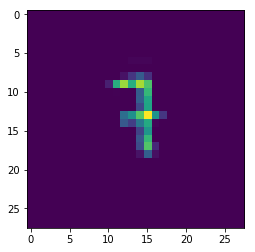

Your algorithm predicts: y = 4


In [33]:
#Prediction on Own Image

import scipy
from PIL import Image, ImageFilter
from scipy import ndimage
from matplotlib import pyplot as plt

#Image Processing to fit the algorithm
my_image_logic = [imageprepare('images/handwriting.png')]
my_image = np.transpose(my_image_logic)
print(len(my_image_logic))# mnist IMAGES are 28x28=784 pixels
newArr=[[0 for d in range(28)] for y in range(28)]
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=my_image_logic[0][k]
        k=k+1
plt.imshow(newArr, interpolation='nearest')
plt.show()

W1 = tf.convert_to_tensor(parameters["W1"])
b1 = tf.convert_to_tensor(parameters["b1"])
W2 = tf.convert_to_tensor(parameters["W2"])
b2 = tf.convert_to_tensor(parameters["b2"])
W3 = tf.convert_to_tensor(parameters["W3"])
b3 = tf.convert_to_tensor(parameters["b3"])
    
params = {"W1": W1,
          "b1": b1,
          "W2": W2,
          "b2": b2,
          "W3": W3,
          "b3": b3}

x = tf.placeholder("float", [784, 1])

z3 = forward_propagation_for_predict(x, params)

p = tf.argmax(z3)

sess = tf.Session()
my_image_prediction = sess.run(p, feed_dict = {x: my_image})

print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))